In [1]:

import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:

train_data = pd.read_csv('FinalTrain31Aug.csv')
test_data = pd.read_csv('FinalTest31Aug.csv')

In [3]:
testId = pd.read_csv('testTransId.csv', header=None)

In [4]:
X, y = train_data.drop('FraudResult', axis=1), train_data['FraudResult']

In [5]:
X.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,Within_CI95_7days_Yes,Within_CI95_14days_Yes,Within_CI95_21days_Yes,Within_CI95_28days_Yes
0,1000.0,3,66,0.0,40,1000.0,2.200000,1000.0,1000.0,1000.0,...,1,0,0,0,0,1,1,1,1,1
1,-20.0,3,30893,0.0,40,1000.0,0.316667,-20.0,-20.0,-20.0,...,1,1,0,0,0,1,1,1,1,1
2,500.0,3,2,0.0,40,1000.0,2.200000,500.0,500.0,500.0,...,0,0,0,0,0,1,1,1,1,1
3,20000.0,3,26,1800.0,40,1000.0,2.200000,20000.0,20000.0,20000.0,...,1,0,0,0,0,1,1,1,1,1
4,-644.0,3,30893,0.0,40,20000.0,1.433333,-644.0,-644.0,-644.0,...,1,1,0,0,0,1,1,1,1,1


In [6]:
X['Amount'].describe()

count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64

In [7]:
train_times = pd.read_csv('train_trans_time.csv', parse_dates=['Time'])
test_times = pd.read_csv('test_trans_time.csv', parse_dates=['Time'])

In [8]:
train_times.head(4)

,Time
0,2018-11-15 02:18:49+00:00
1,2018-11-15 02:19:08+00:00
2,2018-11-15 02:44:21+00:00
3,2018-11-15 03:32:55+00:00


In [9]:
train_data = pd.concat([train_times, train_data], axis=1)
test_data = pd.concat([test_times, test_data], axis=1)

In [10]:
train_data.head()

,Time,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,...,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,Within_CI95_7days_Yes,Within_CI95_14days_Yes,Within_CI95_21days_Yes,Within_CI95_28days_Yes,FraudResult
0,2018-11-15 02:18:49+00:00,1000.0,3,66,0.0,40,1000.0,2.200000,1000.0,1000.0,...,0,0,0,0,1,1,1,1,1,0
1,2018-11-15 02:19:08+00:00,-20.0,3,30893,0.0,40,1000.0,0.316667,-20.0,-20.0,...,1,0,0,0,1,1,1,1,1,0
2,2018-11-15 02:44:21+00:00,500.0,3,2,0.0,40,1000.0,2.200000,500.0,500.0,...,0,0,0,0,1,1,1,1,1,0
3,2018-11-15 03:32:55+00:00,20000.0,3,26,1800.0,40,1000.0,2.200000,20000.0,20000.0,...,0,0,0,0,1,1,1,1,1,0
4,2018-11-15 03:34:21+00:00,-644.0,3,30893,0.0,40,20000.0,1.433333,-644.0,-644.0,...,1,0,0,0,1,1,1,1,1,0


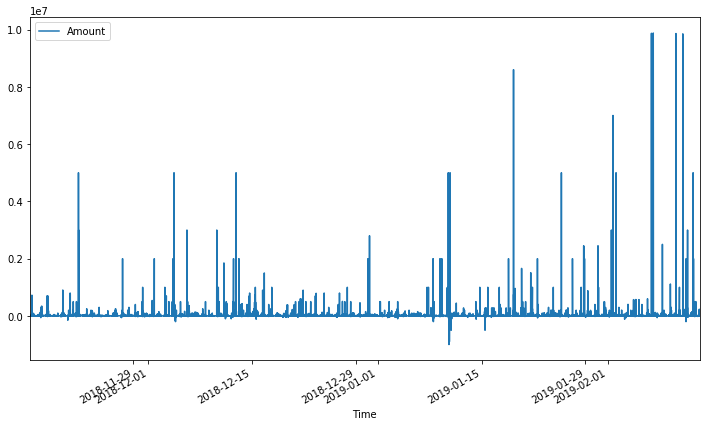

In [11]:

train_data.plot(x='Time', y='Amount', figsize=(12, 7))

In [12]:
train_data['Time'].min()

Timestamp('2018-11-15 02:18:49+0000', tz='UTC')

In [13]:
train_data['Time'].max()

Timestamp('2019-02-13 10:01:28+0000', tz='UTC')

In [14]:
train_data.columns

Index(['Time', 'Amount', 'PricingStrategy', 'No. Customers per Acc',
       'ExtraCharges', 'Days_to_Nearest_Holiday', 'Prev_Amt',
       'Time_since_last_trans', 'Avg_amt_per_ProviderId_in_last_12hhrs',
       'sum_of_amt_per_ProviderId_in_last_12hhrs',
       ...
       'Multiple_Sub_by_Acc_Yes', 'Week_first_week', 'Week_fourth_week',
       'Week_second_week', 'Week_third_week', 'Within_CI95_7days_Yes',
       'Within_CI95_14days_Yes', 'Within_CI95_21days_Yes',
       'Within_CI95_28days_Yes', 'FraudResult'],
      dtype='object', length=193)

In [15]:
(train_data['Amount']**(1/11))

0        1.873817
1             NaN
2        1.759385
3        2.460383
4             NaN
5        1.995693
6        2.310130
7             NaN
8        1.759385
9        1.788789
10       1.854071
11            NaN
12       1.788789
13       2.125495
14       2.125495
15       2.125495
16       1.759385
17       1.873817
18            NaN
19       1.759385
20            NaN
21       1.759385
22            NaN
23       1.873817
24       1.759385
25            NaN
26       1.873817
27       2.099849
28            NaN
29       1.995693
           ...   
95632    1.873817
95633    2.396871
95634    1.873817
95635    1.873817
95636         NaN
95637         NaN
95638    2.396871
95639    1.873817
95640    2.396871
95641    1.873817
95642         NaN
95643    2.396871
95644    1.905134
95645    2.169052
95646         NaN
95647         NaN
95648    1.995693
95649    2.070627
95650    2.057681
95651    2.070627
95652    1.966424
95653         NaN
95654    1.873817
95655         NaN
95656    2

In [16]:
data = train_data[['Time', 'Amount', 'No. Customers per Acc', 'Prev_Amt', 'Time_since_last_trans']]
test = test_data[['Time', 'Amount', 'No. Customers per Acc', 'Prev_Amt', 'Time_since_last_trans']]

In [17]:
data['Time'] = pd.to_datetime(data['Time'])
test['Time'] = pd.to_datetime(test['Time'])

data.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Time,Amount,No. Customers per Acc,Prev_Amt,Time_since_last_trans
0,2018-11-15 02:18:49+00:00,1000.0,66,1000.0,2.200000
1,2018-11-15 02:19:08+00:00,-20.0,30893,1000.0,0.316667
2,2018-11-15 02:44:21+00:00,500.0,2,1000.0,2.200000
3,2018-11-15 03:32:55+00:00,20000.0,26,1000.0,2.200000
4,2018-11-15 03:34:21+00:00,-644.0,30893,20000.0,1.433333


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
data.loc[:, data.columns[1:]] = scaler.fit_transform(data.loc[:, data.columns[1:]])
test.loc[:, data.columns[1:]] = scaler.transform(test.loc[:, data.columns[1:]])

data.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with inp

,Time,Amount,No. Customers per Acc,Prev_Amt,Time_since_last_trans
0,2018-11-15 02:18:49+00:00,-0.046371,-0.718149,-0.044306,-0.231504
1,2018-11-15 02:19:08+00:00,-0.054643,1.444841,-0.044306,-0.231907
2,2018-11-15 02:44:21+00:00,-0.050426,-0.722639,-0.044306,-0.231504
3,2018-11-15 03:32:55+00:00,0.107717,-0.720955,-0.044306,-0.231504
4,2018-11-15 03:34:21+00:00,-0.059704,1.444841,0.119309,-0.231668


In [20]:
from sklearn.decomposition import PCA


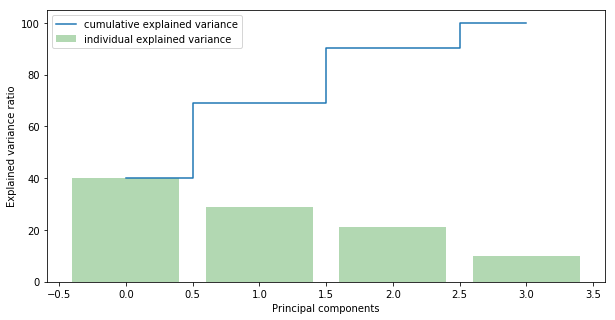

In [21]:

X_std = data[['Amount', 'No. Customers per Acc', 'Prev_Amt', 'Time_since_last_trans']]
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [22]:

# reduce to 2 important features
pca = PCA(n_components=2)
df = pca.fit_transform(data[['Amount', 'No. Customers per Acc', 'Prev_Amt', 'Time_since_last_trans']])
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)

In [23]:
from sklearn.cluster import KMeans

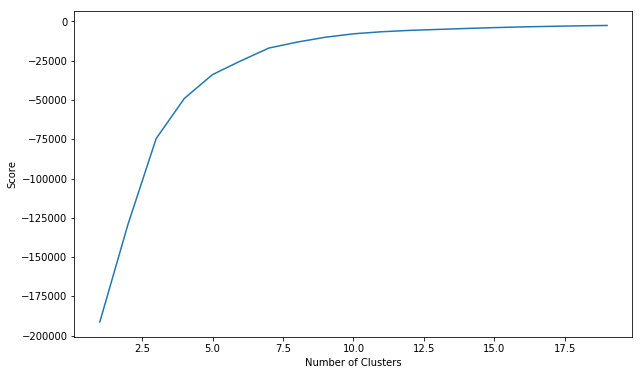

In [24]:
#calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(df) for i in n_cluster]
scores = [kmeans[i].score(df) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show();

In [27]:
kmeans[9]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
data['cluster'] = kmeans[9].predict(df)
data.index = df.index
data['principal_feature1'] = df[0]
data['principal_feature2'] = df[1]
data['cluster'].value_counts()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

0    58409
2    30802
9     4623
5     1006
8      424
3      257
6       89
1       33
7       15
4        4
Name: cluster, dtype: int64

In [29]:
data.head(3)

,Time,Amount,No. Customers per Acc,Prev_Amt,Time_since_last_trans,cluster,principal_feature1,principal_feature2
0,2018-11-15 02:18:49+00:00,-0.046371,-0.718149,-0.044306,-0.231504,0,-0.010882,0.319609
1,2018-11-15 02:19:08+00:00,-0.054643,1.444841,-0.044306,-0.231907,2,-0.146845,-1.090084
2,2018-11-15 02:44:21+00:00,-0.050426,-0.722639,-0.044306,-0.231504,0,-0.012866,0.322649


In [ ]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(df, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
data['anomaly1'] = (distance >= threshold).astype(int)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], c=data["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [ ]:
data.anomaly1.value_counts()